# Measurement of memory usage in MATLAB native functions ver. 1.0

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import re
from datetime import datetime, timedelta

In [2]:
def create_df(fname_prefix, test_values, fname_postfix=''):
    regex_time = re.compile('top - ([0-9]*:[0-9]*:[0-9]*)')
    df = []
    for value in test_values:
        fname = fname_prefix + value + fname_postfix + '.log'
        try:
            with open(fname) as file:
                lines = file.readlines()
        except FileNotFoundError:
            print('not found {}', fname)
            continue

        vrt = []
        res = []
        times = []
        for line in lines:
            line = line.rstrip()
            
            if re.search('^top -', line):
                m = regex_time.search(line)
                tm = m.group(1)
            elif re.search('MATLAB', line):
                t = line.split()
                v = t[4]
                r = t[5]
                try:
                    # bytes
                    v = float(v) / 10**6
                except ValueError:
                    if re.search('g', v):
                        v = float(v.rstrip('g')) * 10**3
                    elif re.search('m', v):
                        v = float(v.rstrip('m'))
                    elif re.search('t', v):
                        v = float(v.rstrip('t')) * 10**6

                try:
                    # bytes
                    r = float(r) / 10**6
                except ValueError:
                    if re.search('g', r):
                        r = float(r.rstrip('g')) * 10**3
                    elif re.search('m', r):
                        r = float(r.rstrip('m'))
                    elif re.search('t', r):
                        r = float(r.rstrip('t')) * 10**6

                times.append(tm)
                vrt.append(v)
                res.append(r)

#         print(len(times))
#         print(len(vrt))
#         print(len(res))
        df.append(pd.DataFrame.from_dict({'time': times, 'virt': vrt, 'res': res}))
#         print(df)
        df[-1]['time'] = pd.to_datetime(df[-1]['time'])
        df[-1]['elapsed_time'] = pd.to_timedelta(df[-1]['time'] - df[-1]['time'][0]) / timedelta(seconds=1)
    return df

In [3]:
dataframes = {}
test_values = {}

In [4]:
cmap = cm.get_cmap('tab10')

## Memory usage plots in quantilenorm

In [462]:
test_values['quantilenorm'] = ['1e7','0.2e8','0.4e8','0.6e8','0.8e8','1e8']
dataframes['quantilenorm'] = create_df('../memory-usage/top-quantilenorm-nrows-', test_values['quantilenorm'])

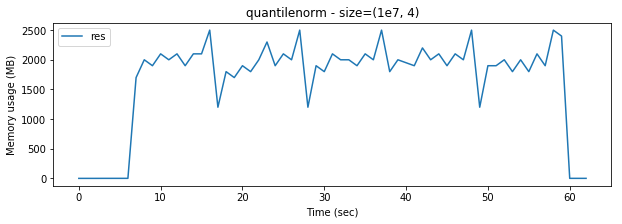

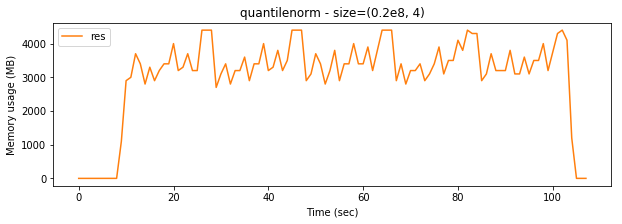

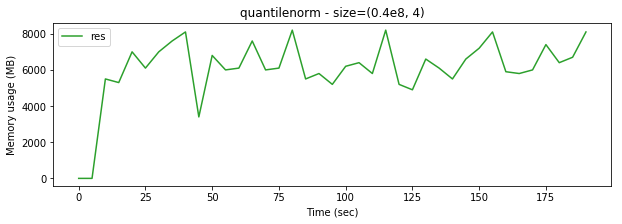

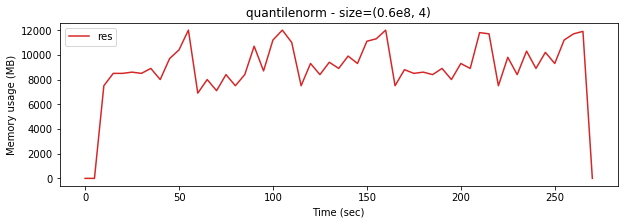

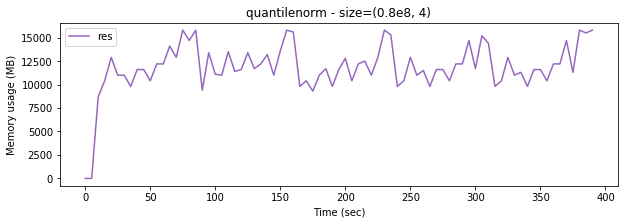

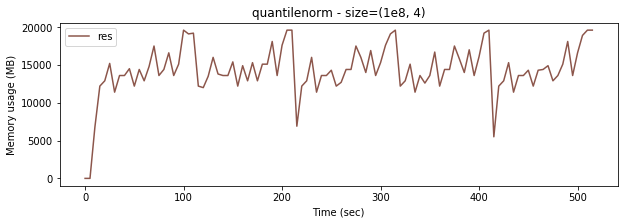

In [463]:
for i in range(0, len(dataframes['quantilenorm'])):
    fig = dataframes['quantilenorm'][i].plot(x='elapsed_time', y='res', figsize=(10,3), color=cmap.colors[i])
    fig.set_title('quantilenorm - size=(%s, 4)' % test_values['quantilenorm'][i])
    fig.set_xlabel('Time (sec)')
    fig.set_ylabel('Memory usage (MB)')

In [432]:
max_list = [col['res'].max()/1000 for col in dataframes['quantilenorm']]
df1 = pd.DataFrame({'test values': test_values['quantilenorm'], 'max': max_list})
df1['test values'] = pd.to_numeric(df1['test values'])
df1['input data size'] = df1['test values']*4*8/10**9
df1['5x input data size'] = df1['input data size']*5
df1['6x input data size'] = df1['input data size']*6
df1['7x input data size'] = df1['input data size']*7

Text(0,0.5,'Max memory usage (GB)')

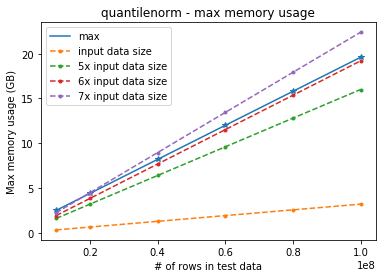

In [433]:
fig = df1.plot(x='test values', y='max', style='*-')
fig = df1.plot(x='test values', 
              y=['input data size','5x input data size','6x input data size','7x input data size'],
              style='.--', ax=fig)

fig.set_title('quantilenorm - max memory usage')
fig.set_xlabel('# of rows in test data')
fig.set_ylabel('Max memory usage (GB)')

## Memory usage plots in pdist2

In [44]:
test_values['pdist2'] = ['1e4','0.2e5','0.4e5','0.6e5','0.8e5','1e5']
dataframes['pdist2'] = create_df('../memory-usage/top-pdist2-nrows-', test_values['pdist2'])

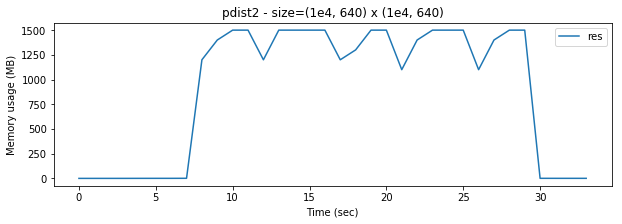

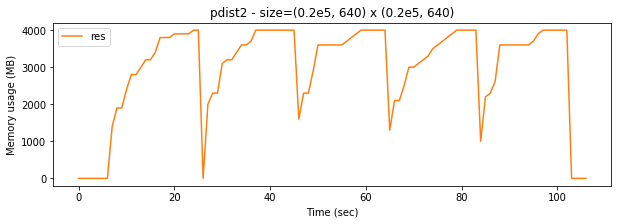

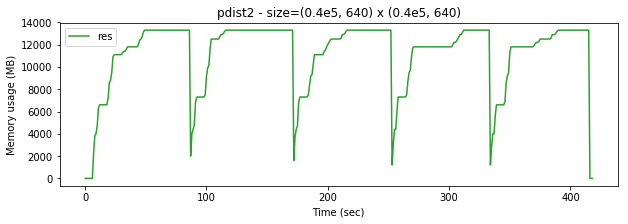

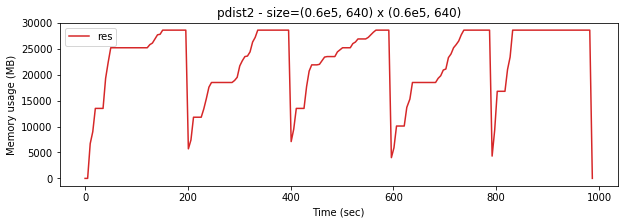

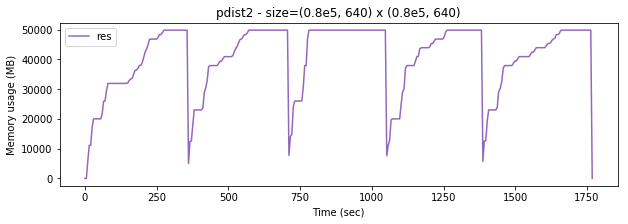

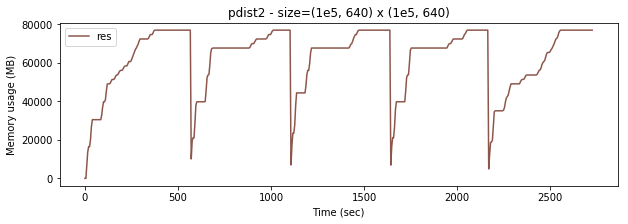

In [45]:
for i in range(0, len(dataframes['pdist2'])):
    fig = dataframes['pdist2'][i].plot(x='elapsed_time', y='res', figsize=(10, 3), color=cmap.colors[i])
    fig.set_title('pdist2 - size=(%s, 640) x (%s, 640)' % (test_values['pdist2'][i], test_values['pdist2'][i]))
    fig.set_xlabel('Time (sec)')
    fig.set_ylabel('Memory usage (MB)')

In [46]:
max_list = [col['res'].max()/1000 for col in dataframes['pdist2']]
df2 = pd.DataFrame({'test values': test_values['pdist2'], 'max': max_list})
df2['test values'] = pd.to_numeric(df2['test values'])
df2['input data size'] = df2['test values']*640*2*8/10**9
df2['output data size'] = df2['test values']**2*8/10**9

Text(0,0.5,'Max memory usage (GB)')

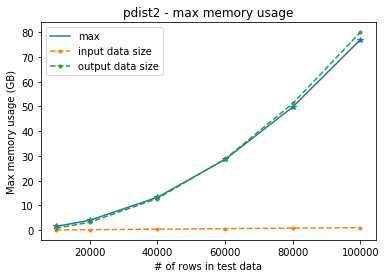

In [47]:
fig = df2.plot(x='test values', y='max', style='*-')
fig = df2.plot(x='test values', y=['input data size','output data size'], style='.--', ax=fig)

fig.set_title('pdist2 - max memory usage')
fig.set_xlabel('# of rows in test data')
fig.set_ylabel('Max memory usage (GB)')

## Memory usage plots in sqrt-bsxfun-dist2

In [48]:
test_values['sqrt-bsxfun-dist2'] = ['1e4','0.2e5','0.4e5','0.6e5','0.8e5','1e5']
dataframes['sqrt-bsxfun-dist2'] = create_df('../memory-usage/top-sqrt-bsxfun-dist2-nrows-',
                                            test_values['sqrt-bsxfun-dist2'])

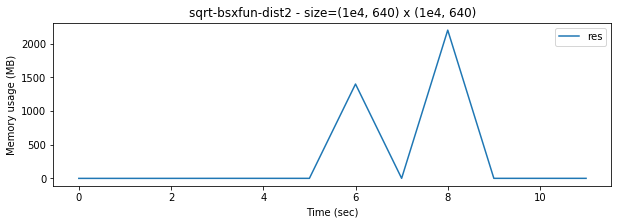

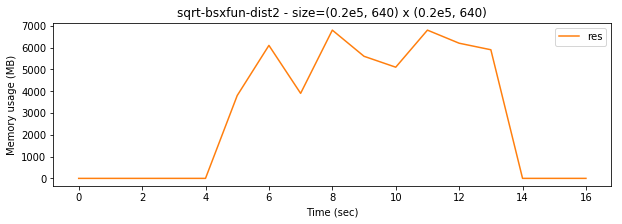

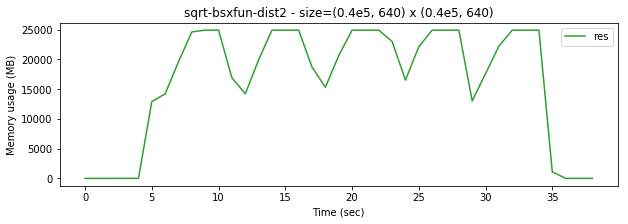

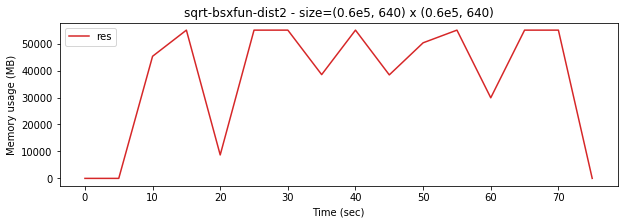

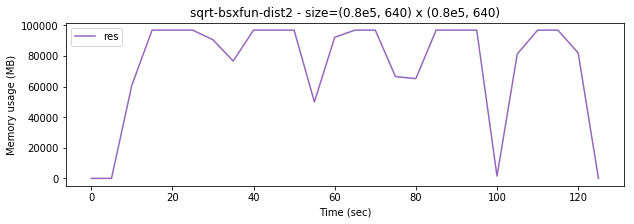

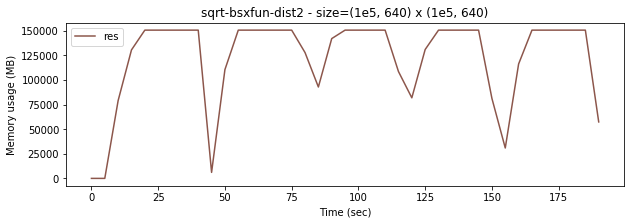

In [49]:
for i in range(0, len(dataframes['sqrt-bsxfun-dist2'])):
    fig = dataframes['sqrt-bsxfun-dist2'][i].plot(x='elapsed_time', y='res', figsize=(10, 3), color=cmap.colors[i])
    fig.set_title('sqrt-bsxfun-dist2 - size=(%s, 640) x (%s, 640)' % 
                  (test_values['sqrt-bsxfun-dist2'][i], test_values['sqrt-bsxfun-dist2'][i]))
    fig.set_xlabel('Time (sec)')
    fig.set_ylabel('Memory usage (MB)')

In [50]:
max_list = [col['res'].max()/1000 for col in dataframes['sqrt-bsxfun-dist2']]
df3 = pd.DataFrame({'test values': test_values['sqrt-bsxfun-dist2'], 'max': max_list})
df3['test values'] = pd.to_numeric(df3['test values'])

df3['input data size'] = df3['test values']*640*2*8/10**9
df3['output data size'] = df3['test values']**2*8/10**9
df3['1.8x output data size'] = df3['output data size']*1.8
df3['1.9x output data size'] = df3['output data size']*1.9
df3['2x output data size'] = df3['output data size']*2

Text(0,0.5,'Max memory usage (GB)')

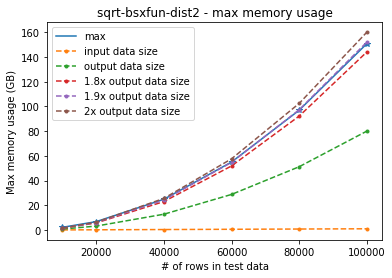

In [51]:
fig = df3.plot(x='test values', y='max', style='*-')
fig = df3.plot(x='test values', y=['input data size','output data size','1.8x output data size','1.9x output data size','2x output data size'], 
               style='.--', ax=fig)

fig.set_title('sqrt-bsxfun-dist2 - max memory usage')
fig.set_xlabel('# of rows in test data')
fig.set_ylabel('Max memory usage (GB)')

### Comparison of calculation time between pdist2 and sqrt-bsxfun-dist2

In [55]:
pdist2_calc_time_list = [col['elapsed_time'].max() for col in dataframes['pdist2']]
sq_bsx_dist2_calc_time_list = [col['elapsed_time'].max() for col in dataframes['sqrt-bsxfun-dist2']]
# Fortunately, test_values are the same in two measurements
df_c = pd.DataFrame({'test values': pd.to_numeric(test_values['pdist2']), 
                     'calc time of pdist2': pdist2_calc_time_list, 
                     'calc time of sqrt-bsxfun-dist2': sq_bsx_dist2_calc_time_list})

Text(0,0.5,'Time (sec)')

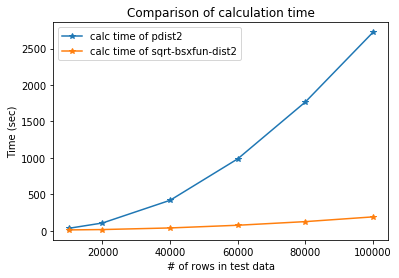

In [58]:
fig = df_c.plot(x='test values', y=['calc time of pdist2','calc time of sqrt-bsxfun-dist2'], style='*-')

fig.set_title('Comparison of calculation time')
# fig.set_xscale('log')
fig.set_xlabel('# of rows in test data')
fig.set_ylabel('Time (sec)')

In [464]:
df_m = pd.DataFrame({'test values': pd.to_numeric(test_values['pdist2']), 
                     'max memory usage of pdist2': df2['max'], 
                     'max memory usage of sqrt-bsxfun-dist2': df3['max']})

Text(0,0.5,'Time (sec)')

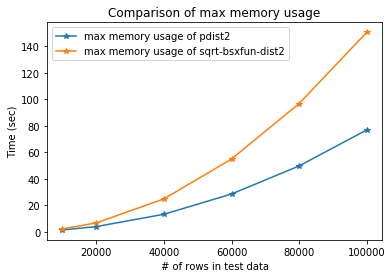

In [466]:
fig = df_m.plot(x='test values', y=['max memory usage of pdist2','max memory usage of sqrt-bsxfun-dist2'], style='*-')

fig.set_title('Comparison of max memory usage')
fig.set_xlabel('# of rows in test data')
fig.set_ylabel('Max memory usage (GB)')

### Comparison of calculation time between pdist2 and sqrt-bsxfun-dist2  (x-axis is test data size)

In [63]:
pdist2_calc_time_list = [col['elapsed_time'].max() for col in dataframes['pdist2']]
sq_bsx_dist2_calc_time_list = [col['elapsed_time'].max() for col in dataframes['sqrt-bsxfun-dist2']]
# Fortunately, test_values are the same in two measurements
df_c = pd.DataFrame({'test data size': pd.to_numeric([float(x)**2/10**9 for x in test_values['pdist2']]), 
                     'calc time of pdist2': pdist2_calc_time_list, 
                     'calc time of sqrt-bsxfun-dist2': sq_bsx_dist2_calc_time_list})

Text(0,0.5,'Time (sec)')

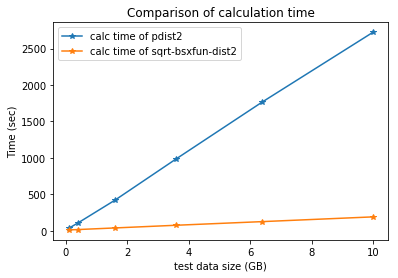

In [64]:
fig = df_c.plot(x='test data size', y=['calc time of pdist2','calc time of sqrt-bsxfun-dist2'], style='*-')

fig.set_title('Comparison of calculation time')
# fig.set_xscale('log')
fig.set_xlabel('test data size (GB)')
fig.set_ylabel('Time (sec)')

In [69]:
df_m = pd.DataFrame({'test data size': pd.to_numeric([float(x)**2/10**9 for x in test_values['pdist2']]), 
                     'max memory usage of pdist2': df2['max'], 
                     'max memory usage of sqrt-bsxfun-dist2': df3['max']})

Text(0,0.5,'Max memory usage (GB)')

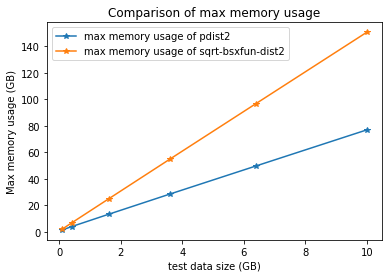

In [70]:
fig = df_m.plot(x='test data size', y=['max memory usage of pdist2','max memory usage of sqrt-bsxfun-dist2'], style='*-')

fig.set_title('Comparison of max memory usage')
fig.set_xlabel('test data size (GB)')
fig.set_ylabel('Max memory usage (GB)')

## Memory usage plots in pdist2 (2)

In [5]:
test_values['pdist2-2'] = ['1e3','0.2e4','0.4e4','0.6e4','0.8e4','1e4']
dataframes['pdist2-2'] = create_df('../memory-usage/top-pdist2-ncols-3-n1rows-', test_values['pdist2-2'], '-n2rows-1.4e5')

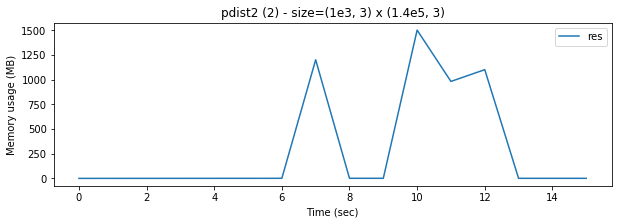

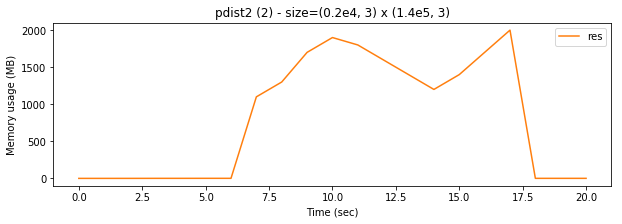

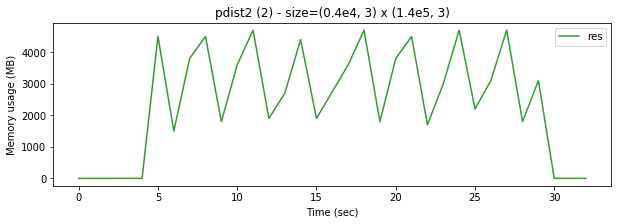

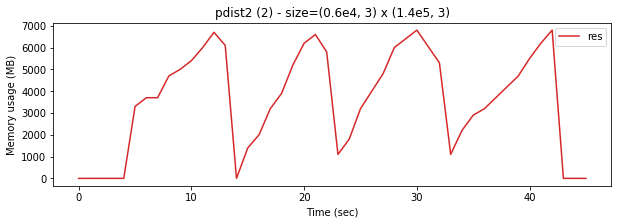

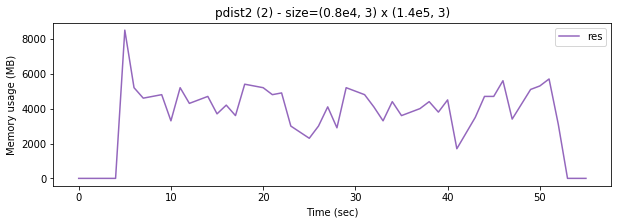

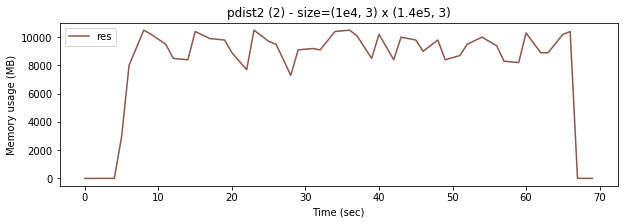

In [6]:
for i in range(0, len(dataframes['pdist2-2'])):
    fig = dataframes['pdist2-2'][i].plot(x='elapsed_time', y='res', figsize=(10, 3), color=cmap.colors[i])
    fig.set_title('pdist2 (2) - size=(%s, 3) x (1.4e5, 3)' % (test_values['pdist2-2'][i]))
    fig.set_xlabel('Time (sec)')
    fig.set_ylabel('Memory usage (MB)')

In [7]:
max_list = [col['res'].max()/1000 for col in dataframes['pdist2-2']]
df9 = pd.DataFrame({'test values': test_values['pdist2-2'], 'max': max_list})
df9['test values'] = pd.to_numeric(df9['test values'])
df9['input data size'] = (df9['test values']+1.4e5)*3*8/10**9
df9['output data size'] = df9['test values']*1.4e5*8/10**9

Text(0,0.5,'Max memory usage (GB)')

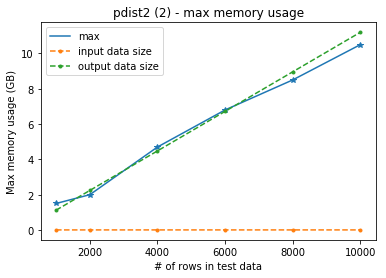

In [8]:
fig = df9.plot(x='test values', y='max', style='*-')
fig = df9.plot(x='test values', y=['input data size','output data size'], style='.--', ax=fig)

fig.set_title('pdist2 (2) - max memory usage')
fig.set_xlabel('# of rows in test data')
fig.set_ylabel('Max memory usage (GB)')

## Memory usage plots in sqrt-bsxfun-dist2 (2)

In [9]:
test_values['sqrt-bsxfun-dist2-2'] = ['1e3','0.2e4','0.4e4','0.6e4','0.8e4','1e4']
dataframes['sqrt-bsxfun-dist2-2'] = create_df('../memory-usage/top-sqrt-bsxfun-dist2-ncols-3-n1rows-',
                                            test_values['sqrt-bsxfun-dist2-2'], '-n2rows-1.4e5')

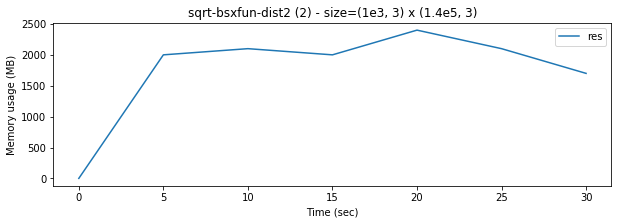

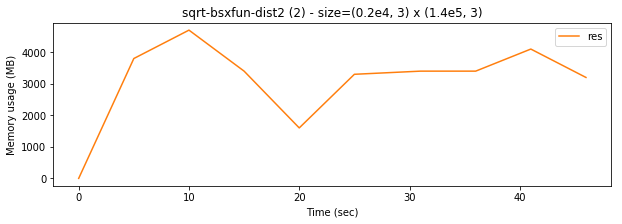

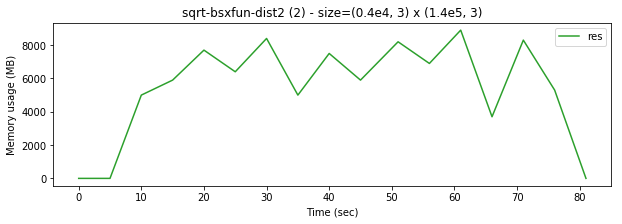

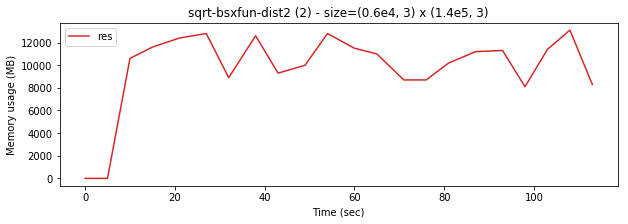

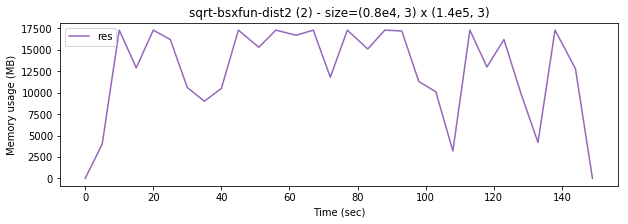

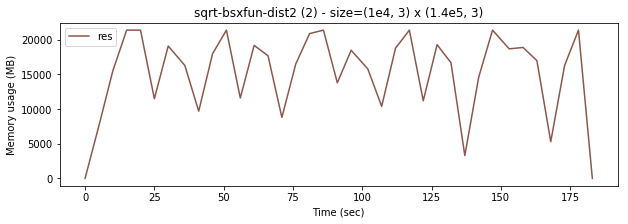

In [10]:
for i in range(0, len(dataframes['sqrt-bsxfun-dist2-2'])):
    fig = dataframes['sqrt-bsxfun-dist2-2'][i].plot(x='elapsed_time', y='res', figsize=(10, 3), color=cmap.colors[i])
    fig.set_title('sqrt-bsxfun-dist2 (2) - size=(%s, 3) x (1.4e5, 3)' % (test_values['sqrt-bsxfun-dist2-2'][i]))
    fig.set_xlabel('Time (sec)')
    fig.set_ylabel('Memory usage (MB)')

In [11]:
max_list = [col['res'].max()/1000 for col in dataframes['sqrt-bsxfun-dist2-2']]
df10 = pd.DataFrame({'test values': test_values['sqrt-bsxfun-dist2-2'], 'max': max_list})
df10['test values'] = pd.to_numeric(df10['test values'])

df10['input data size'] = (df10['test values']+1.4e5)*8/10**9
df10['output data size'] = df10['test values']*1.4e5*8/10**9
df10['1.8x output data size'] = df10['output data size']*1.8
df10['1.9x output data size'] = df10['output data size']*1.9
df10['2x output data size'] = df10['output data size']*2

Text(0,0.5,'Max memory usage (GB)')

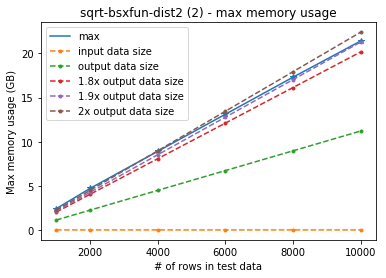

In [12]:
fig = df10.plot(x='test values', y='max', style='*-')
fig = df10.plot(x='test values', y=['input data size','output data size','1.8x output data size','1.9x output data size','2x output data size'], 
               style='.--', ax=fig)

fig.set_title('sqrt-bsxfun-dist2 (2) - max memory usage')
fig.set_xlabel('# of rows in test data')
fig.set_ylabel('Max memory usage (GB)')

### Comparison of calculation time between pdist2 (2) and sqrt-bsxfun-dist2 (2)

In [13]:
pdist2_2_calc_time_list = [col['elapsed_time'].max() for col in dataframes['pdist2-2']]
sq_bsx_dist2_2_calc_time_list = [col['elapsed_time'].max() for col in dataframes['sqrt-bsxfun-dist2-2']]
# Fortunately, test_values are the same in two measurements
df_c = pd.DataFrame({'test values': pd.to_numeric(test_values['pdist2-2']), 
                     'calc time of pdist2 (2)': pdist2_2_calc_time_list, 
                     'calc time of sqrt-bsxfun-dist2 (2)': sq_bsx_dist2_2_calc_time_list})

Text(0,0.5,'Time (sec)')

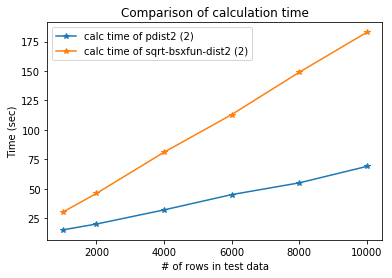

In [14]:
fig = df_c.plot(x='test values', y=['calc time of pdist2 (2)','calc time of sqrt-bsxfun-dist2 (2)'], style='*-')

fig.set_title('Comparison of calculation time')
fig.set_xlabel('# of rows in test data')
fig.set_ylabel('Time (sec)')

In [15]:
df_m = pd.DataFrame({'test values': pd.to_numeric(test_values['pdist2-2']), 
                     'max memory usage of pdist2 (2)': df9['max'], 
                     'max memory usage of sqrt-bsxfun-dist2 (2)': df10['max']})

Text(0,0.5,'Max memory usage (GB)')

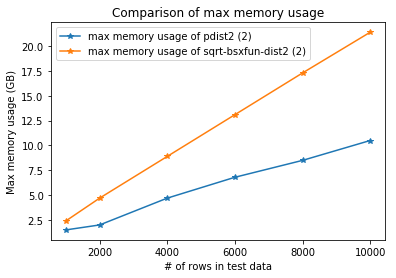

In [16]:
fig = df_m.plot(x='test values', y=['max memory usage of pdist2 (2)','max memory usage of sqrt-bsxfun-dist2 (2)'], style='*-')

fig.set_title('Comparison of max memory usage')
fig.set_xlabel('# of rows in test data')
fig.set_ylabel('Max memory usage (GB)')

## Memory usage plots in imresize3

In [318]:
test_values['imresize3'] = ['1000','2000','3000','4000','5000']
dataframes['imresize3'] = create_df('../memory-usage/top-imresize3-0.5-xy-', test_values['imresize3'], '-z-250')

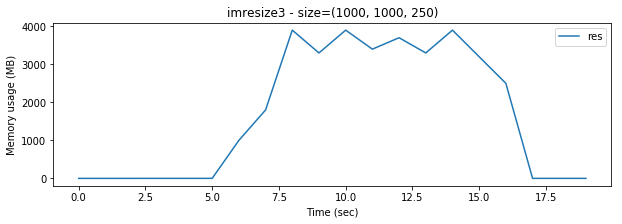

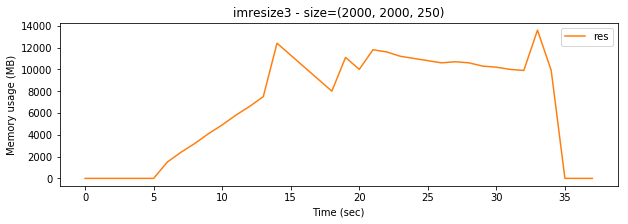

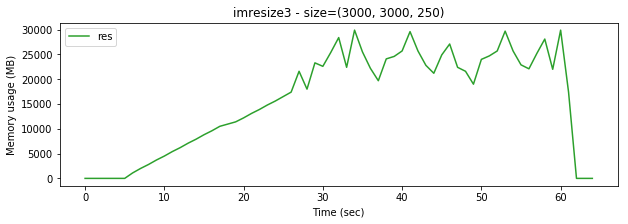

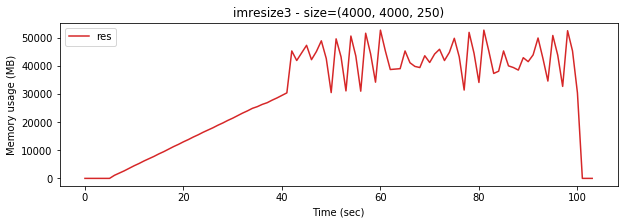

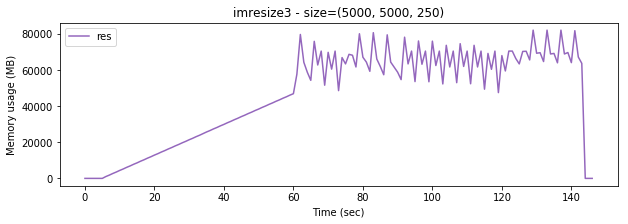

In [319]:
for i in range(0, len(dataframes['imresize3'])):
    fig = dataframes['imresize3'][i].plot(x='elapsed_time', y='res', figsize=(10, 3), color=cmap.colors[i])
    fig.set_title('imresize3 - size=(%s, %s, 250)' % 
                  (test_values['imresize3'][i], test_values['imresize3'][i]))
    fig.set_xlabel('Time (sec)')
    fig.set_ylabel('Memory usage (MB)')

In [434]:
max_list = [col['res'].max()/1000 for col in dataframes['imresize3']]
df4 = pd.DataFrame({'test values': test_values['imresize3'], 'max': max_list})
df4['test values'] = pd.to_numeric(df4['test values'])
df4['input data size'] = df4['test values']**2*250*8/10**9
df4['output data size'] = df4['input data size']/2
df4['1.5x input data size'] = df4['input data size']*1.5
df4['1.6x input data size'] = df4['input data size']*1.6
df4['1.7x input data size'] = df4['input data size']*1.7
df4['2x input data size'] = df4['input data size']*2

Text(0,0.5,'Max memory usage (GB)')

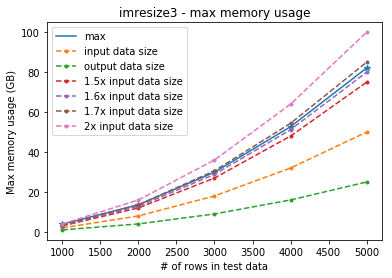

In [435]:
fig = df4.plot(x='test values', y='max', style='*-')
fig = df4.plot(x='test values', 
              y=['input data size','output data size','1.5x input data size','1.6x input data size','1.7x input data size','2x input data size'],
              style='.--', ax=fig)

fig.set_title('imresize3 - max memory usage')
fig.set_xlabel('# of rows in test data')
fig.set_ylabel('Max memory usage (GB)')

## Memory usage plots in imwarp

In [370]:
test_values['imwarp'] = ['1000','2000','3000','4000','5000']
dataframes['imwarp'] = create_df('../memory-usage/top-imwarp-xy-', test_values['imwarp'], '-z-250')

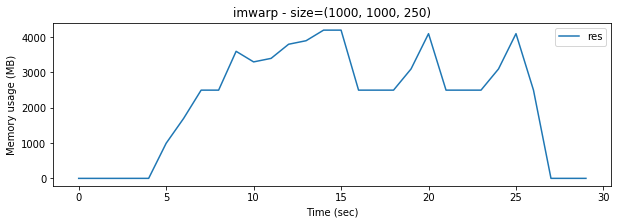

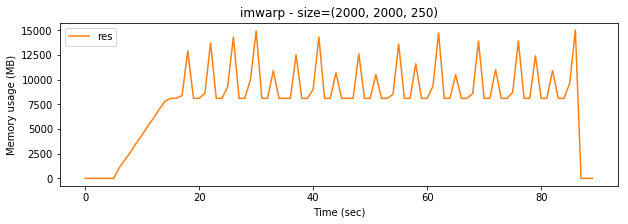

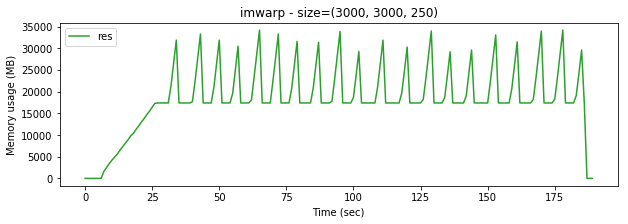

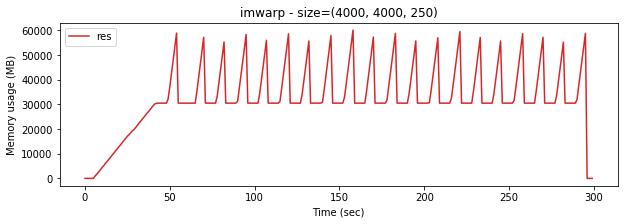

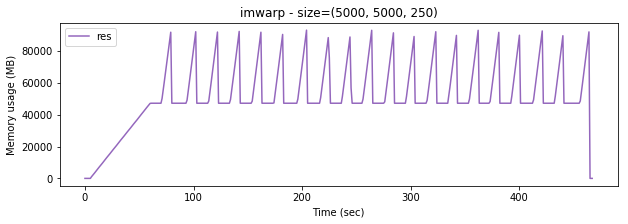

In [371]:
for i in range(0, len(dataframes['imwarp'])):
    fig = dataframes['imwarp'][i].plot(x='elapsed_time', y='res', figsize=(10, 3), color=cmap.colors[i])
    fig.set_title('imwarp - size=(%s, %s, 250)' % 
                  (test_values['imwarp'][i], test_values['imwarp'][i]))
    fig.set_xlabel('Time (sec)')
    fig.set_ylabel('Memory usage (MB)')

In [460]:
max_list = [col['res'].max()/1000 for col in dataframes['imwarp']]
df5 = pd.DataFrame({'test values': test_values['imwarp'], 'max': max_list})
df5['test values'] = pd.to_numeric(df5['test values'])
df5['input data size'] = df5['test values']**2*250*8/10**9
df5['1.7x input data size'] = df5['input data size']*1.7
df5['1.9x input data size'] = df5['input data size']*1.9
df5['2x input data size'] = df5['input data size']*2

Text(0,0.5,'Max memory usage (GB)')

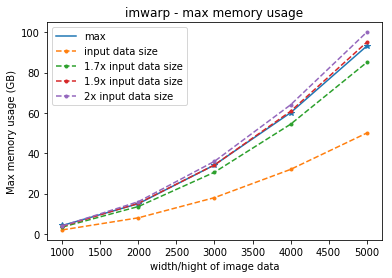

In [461]:
fig = df5.plot(x='test values', y='max', style='*-')
fig = df5.plot(x='test values', 
              y=['input data size','1.7x input data size','1.9x input data size','2x input data size'],
              style='.--', ax=fig)

fig.set_title('imwarp - max memory usage')
fig.set_xlabel('width/hight of image data')
fig.set_ylabel('Max memory usage (GB)')

## Memory usage plots in imtranslate

In [393]:
test_values['imtranslate'] = ['1000','2000','3000','4000','5000']
dataframes['imtranslate'] = create_df('../memory-usage/top-imtranslate-xy-', test_values['imtranslate'], '-z-250')

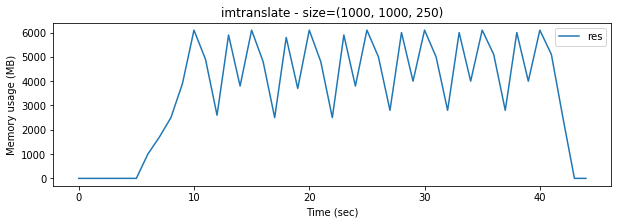

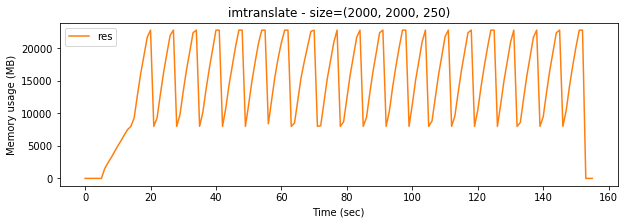

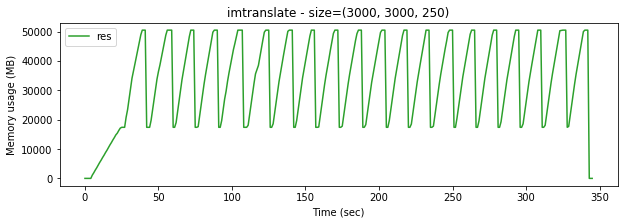

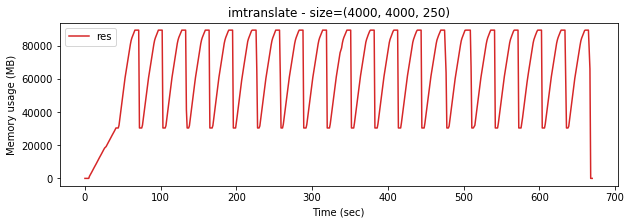

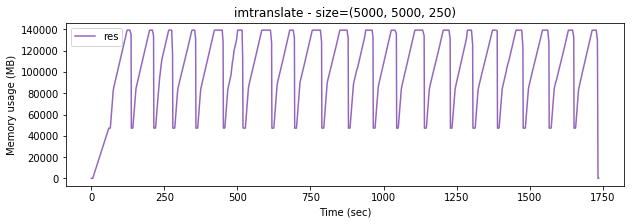

In [394]:
for i in range(0, len(dataframes['imtranslate'])):
    fig = dataframes['imtranslate'][i].plot(x='elapsed_time', y='res', figsize=(10, 3), color=cmap.colors[i])
    fig.set_title('imtranslate - size=(%s, %s, 250)' % 
                  (test_values['imtranslate'][i], test_values['imtranslate'][i]))
    fig.set_xlabel('Time (sec)')
    fig.set_ylabel('Memory usage (MB)')

In [416]:
max_list = [col['res'].max()/1000 for col in dataframes['imtranslate']]
df6 = pd.DataFrame({'test values': test_values['imtranslate'], 'max': max_list})
df6['test values'] = pd.to_numeric(df6['test values'])
df6['input data size'] = df6['test values']**2*250*8/10**9
df6['2x input data size'] = df6['input data size']*2
df6['3x input data size'] = df6['input data size']*3

Text(0,0.5,'Max memory usage (GB)')

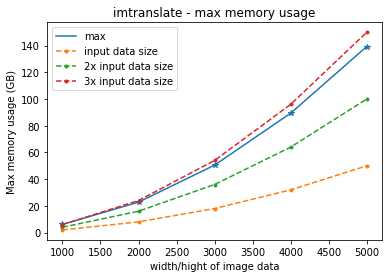

In [438]:
fig = df6.plot(x='test values', y='max', style='*-')
fig = df6.plot(x='test values', 
              y=['input data size','2x input data size','3x input data size'],
              style='.--', ax=fig)

fig.set_title('imtranslate - max memory usage')
fig.set_xlabel('width/hight of image data')
fig.set_ylabel('Max memory usage (GB)')

## Memory usage plots in watershed

In [454]:
test_values['watershed'] = ['500','1000','1500','2000','2500','3000']
dataframes['watershed'] = create_df('../memory-usage/top-watershed-xy-', test_values['watershed'], '-z-250')
# num of puncta = 10000, radius = 2

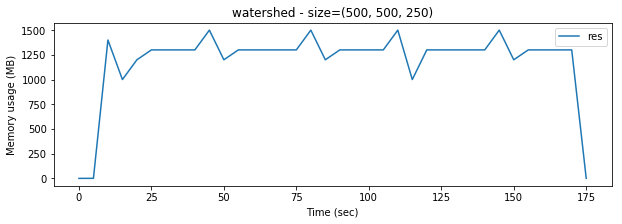

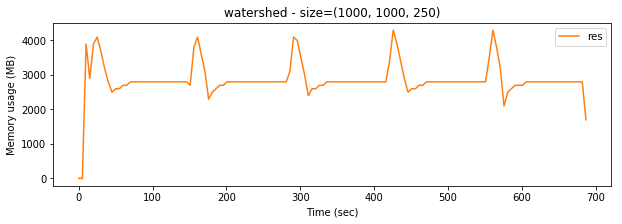

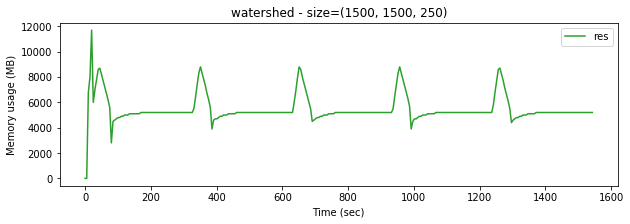

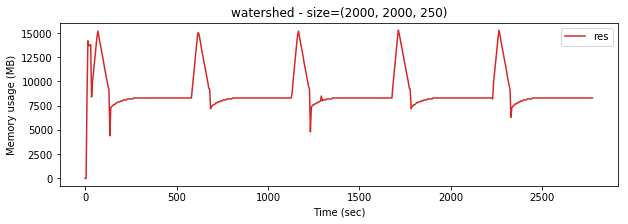

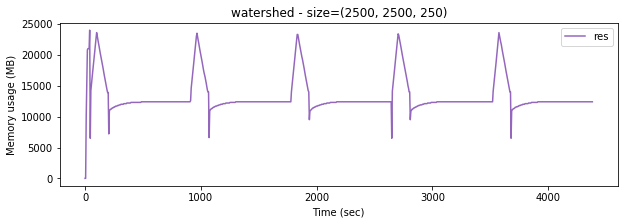

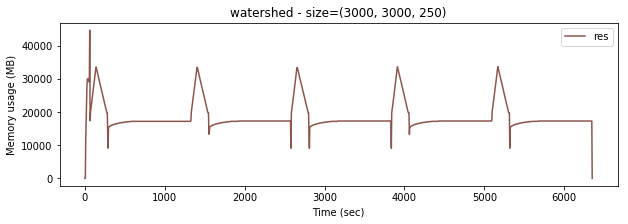

In [455]:
for i in range(0, len(dataframes['watershed'])):
    fig = dataframes['watershed'][i].plot(x='elapsed_time', y='res', figsize=(10, 3), color=cmap.colors[i])
    fig.set_title('watershed - size=(%s, %s, 250)' % 
                  (test_values['watershed'][i], test_values['watershed'][i]))
    fig.set_xlabel('Time (sec)')
    fig.set_ylabel('Memory usage (MB)')

In [458]:
max_list = [col['res'].max()/1000 for col in dataframes['watershed']]
df8 = pd.DataFrame({'test values': test_values['watershed'], 'max': max_list})
df8['test values'] = pd.to_numeric(df8['test values'])
df8['input data size'] = df8['test values']**2*250*8/10**9
df8['2x input data size'] = df8['input data size']*2
df8['2.5x input data size'] = df8['input data size']*2.5

Text(0,0.5,'Max memory usage (GB)')

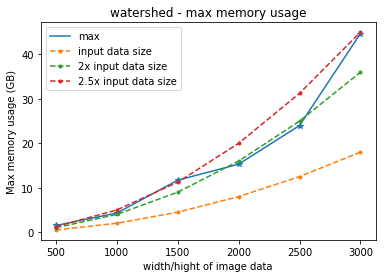

In [459]:
fig = df8.plot(x='test values', y='max', style='*-')
fig = df8.plot(x='test values', 
              y=['input data size','2x input data size','2.5x input data size'],
              style='.--', ax=fig)

fig.set_title('watershed - max memory usage')
fig.set_xlabel('width/hight of image data')
fig.set_ylabel('Max memory usage (GB)')

In [231]:
dataframes['quantilenorm'][0]['res'].max()

2500.0

In [244]:
x = [ float(v) for v in test_values['quantilenorm']]
print(x)

[10000000.0, 20000000.0, 40000000.0, 60000000.0, 80000000.0, 100000000.0]
